<a href="https://colab.research.google.com/github/MurtazAlek/MLDM-2021/blob/main/Murtazina__MLDM_2021_seminar01_homework_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Aleksandra

Last Name: Murtazina

Group:

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [SiLiKhon](https://github.com/SiLiKhon), [dMeVdok](https://github.com/dmevdok), [oleges1](https://github.com/oleges1) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-09-13 05:48:11--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-09-13 05:48:12 (4.19 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [ ]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)
import numpy as np
pvt = data.pivot_table(index=['Pclass'], values=['Survived'],aggfunc=np.mean)
grp_by=(data[['Pclass','Survived']].set_index('Pclass')).groupby(level='Pclass').mean()
print('Compute by pivot table')
print(pvt)
print('Compute by groupby')
print(grp_by)

Compute by pivot table
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Compute by groupby
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


## Task 2 (1 point)

          SibSp
Parch          
0      0.237463
1      1.084746
2      2.062500
3      1.000000
4      0.750000
5      0.600000
6      1.000000
          Parch
SibSp          
0      0.185855
1      0.655502
2      0.642857
3      1.312500
4      1.500000
5      2.000000
8      2.000000


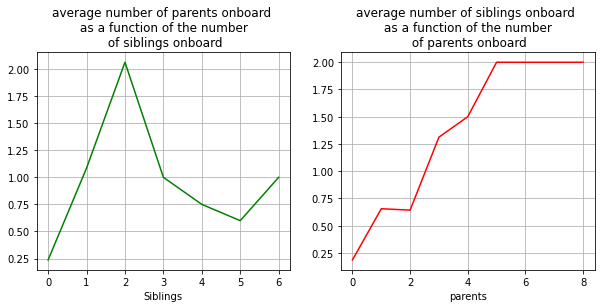

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

grp_by_par=(data[['Parch','SibSp']].set_index('Parch')).groupby(level='Parch').mean()
grp_by_sil=(data[['Parch','SibSp']].set_index('SibSp')).groupby(level='SibSp').mean()
print(grp_by_par)
print(grp_by_sil)

fig_1, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4), squeeze=False)
ax_1=axes[0][0]
ax_1.plot(grp_by_par,color='green',label = 'mean_parents')
ax_1.set_xlabel("Siblings")
ax_1.grid()
ax_1.set_title('average number of parents onboard \n as a function of the number \n of siblings onboard')

ax_2=axes[0][1]
ax_2.plot(grp_by_sil,color='red',label = 'mean_siblings')
ax_2.set_xlabel("parents")
ax_2.grid()
ax_2.set_title('average number of siblings onboard \n as a function of the number \n of parents onboard')
plt.show()

## Task 3 (2 points)

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(data):
    features = data.copy()
    features['Age'] = features['Age'].interpolate(method='linear', inplace=False)
    features['Age'] = features['Age'].fillna(features['Age'].mean())
    features['Sex'] = features['Sex'].replace({"male": int(0), "female": int(1)}, inplace=False)
    features["Fare"] /= features["Fare"].mean()
    dummy = pd.get_dummies(features['Embarked'])
    features = pd.merge(features, dummy, left_index=True, right_index=True)
    features.rename(columns={'C': 'Embarked_C', 'S': 'Embarked_S', 'Q': 'Embarked_Q'}, inplace=False)
    label = ['Name', 'Ticket', 'Cabin', 'Embarked']
    features = features.drop(labels=label, axis=1)
    return features

model = KNeighborsClassifier(
    weights='uniform',
    n_neighbors=8)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.78


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

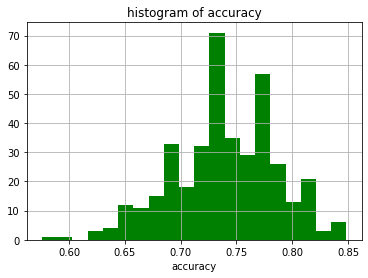

In [ ]:
from sklearn.model_selection import train_test_split

accuracy_dict={}
for number in np.random.randint(10,1000,500):
    X_train, X_test, Y_train, Y_test = train_test_split(
        feature_selection_and_preprocessing(data).drop('Survived', axis=1),
        feature_selection_and_preprocessing(data)['Survived'], test_size=0.11, random_state=number)
    model.fit(X_train,Y_train)
    test_predictions=model.predict(X_test)
    accuracy=accuracy_score(Y_test,test_predictions)
    accuracy_dict[number]=accuracy
#print(accuracy_dict)

plt.hist(accuracy_dict.values(),bins=20,color='green')
plt.xlabel("accuracy")
plt.grid()
plt.title('histogram of accuracy')
plt.show()